### 📝 Bài Tập M2.01:
Mục tiêu của bài tập này là thực hiện các thí nghiệm sau:

1. Huấn luyện và kiểm tra mô hình phân loại SVM (Support Vector Machine) bằng cross-validation;

2. Nghiên cứu ảnh hưởng của tham số gamma trong mô hình SVM bằng validation curve;

3. Sử dụng learning curve để xác định mức độ có ích của việc thêm dữ liệu vào tập huấn luyện khi xây dựng mô hình phân loại.

1. Nạp dữ liệu "blood transfusion" (hiến máu)

In [32]:
import pandas as pd

blood_transfusion = pd.read_csv('../datasets/blood_transfusion.csv')
data = blood_transfusion.drop(columns='Class')
target = blood_transfusion['Class']

### ⚙️ 2. Tạo mô hình phân loại bằng SVM
Trong bài này, ta sẽ dùng Support Vector Machine classifier (SVM).  

- Trong dạng đơn giản nhất, SVM là một mô hình tuyến tính (linear), hoạt động giống như logistic regression.

- Nhưng SVM có thể trở nên linh hoạt hơn bằng cách dùng kernel, ví dụ như RBF kernel.

- Với RBF kernel, ta có một tham số tên là gamma – điều chỉnh độ phức tạp của mô hình.

### 👉 Nhiệm vụ:
Tạo một pipeline gồm:

1. StandardScaler (chuẩn hoá dữ liệu);

2. SVC(kernel="rbf") – mặc định đã là rbf, nên không cần khai báo nếu không muốn.

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC

model = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf')
)

### 🔁 3. Đánh giá hiệu suất mô hình bằng cross-validation
- Sử dụng cross_validate với chiến lược chia dữ liệu là ShuffleSplit.

- Dùng random_state=0, các tham số khác để mặc định.

In [34]:
'''
from sklearn.model_selection import ShuffleSplit, cross_validate

cv = ShuffleSplit(random_state=0)
cv_results = cross_validate(
    model, 
    data, 
    target, 
    cv=cv,
    n_jobs=2,
)
cv_results = pd.DataFrame(cv_results)
cv_results
'''


'\nfrom sklearn.model_selection import ShuffleSplit, cross_validate\n\ncv = ShuffleSplit(random_state=0)\ncv_results = cross_validate(\n    model, \n    data, \n    target, \n    cv=cv,\n    n_jobs=2,\n)\ncv_results = pd.DataFrame(cv_results)\ncv_results\n'

In [35]:
print(
    'Accuracy score of our model: \n'
    f"{cv_results['test_score'].mean():.3f} +/-" 
    f"{cv_results['test_score'].std():.3f}"
)

Accuracy score of our model: 
0.765 +/-0.043


In [36]:
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'svc', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

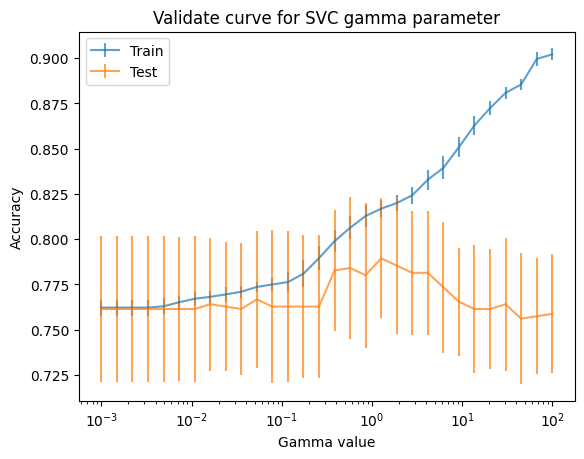

In [37]:
import numpy as np
from sklearn.model_selection import ValidationCurveDisplay

gamma_range = np.logspace(-3, 2, num=30)
disp = ValidationCurveDisplay.from_estimator(
    model, 
    data,
    target,
    param_name='svc__gamma',
    param_range=gamma_range,
    cv=cv,
    scoring='accuracy',
    score_name='Accuracy',
    std_display_style='errorbar',
    errorbar_kw={'alpha': 0.7},
    n_jobs=2,
)

_ = disp.ax_.set(
    xlabel='Gamma value',
    title='Validate curve for SVC gamma parameter',
)

#### Lưu ý
Chỉ có mô hình hồi quy mới có Mean Squared Error thôi, còn các mô hình như SVC, LogisticRegression, DecisionTreeClassifier hoạt động với mục tiêu phân loại (classification), không dự đoán giá trị liên tục 
- Scoring phù hợp với SVC là: 'accuracy', 'f1', 'precision', 'recall', 'roc_auc',...

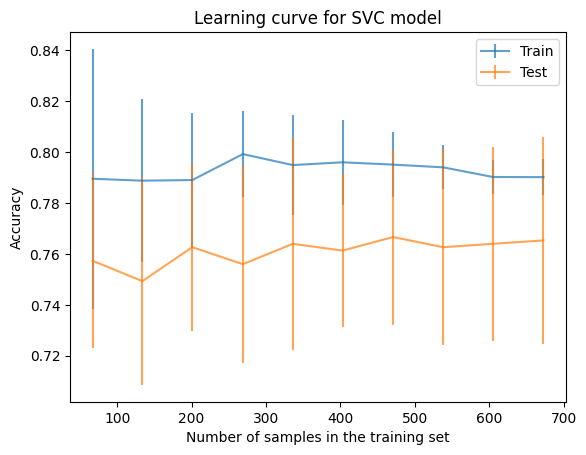

In [41]:
from sklearn.model_selection import LearningCurveDisplay 
train_sizes = np.linspace(0.1, 1.0, num=10)

display = LearningCurveDisplay.from_estimator(
    model,
    data,
    target, 
    train_sizes=train_sizes,
    cv=cv,
    score_type='both',
    scoring='accuracy',
    score_name='Accuracy',
    std_display_style='errorbar',
    errorbar_kw={'alpha': 0.7},
    n_jobs=2
)

_ = display.ax_.set(title='Learning curve for SVC model')